In [12]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [4]:
df

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [7]:
X = df.drop('num', axis=1)
y= df.num

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

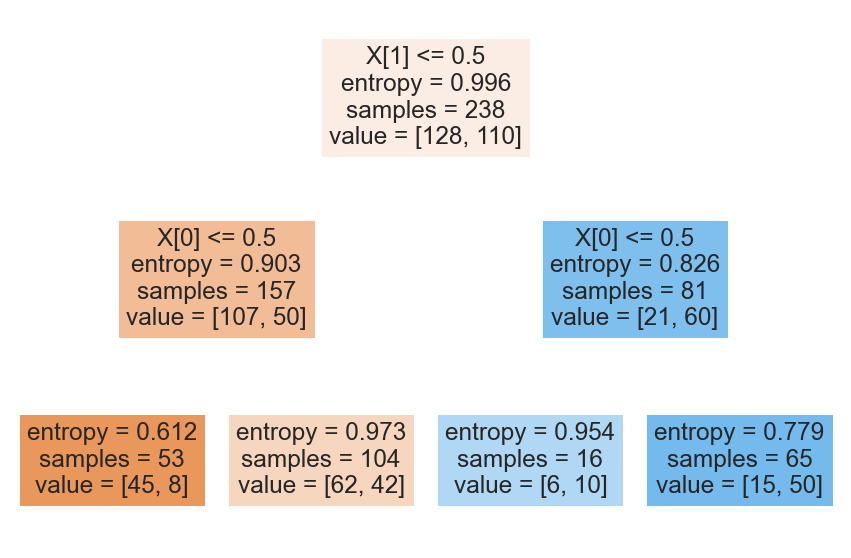

In [13]:
sns.set(rc={'figure.figsize' : (15, 10)})
tree.plot_tree(clf, filled=True);

## Расчет Information Gain (IG)

### Индексы левого поддерева и правого от корня

In [20]:
l_node = clf.tree_.children_left[0]
r_node = clf.tree_.children_right[0]

### Кол-во наблюдений в корне и подкорнях

In [25]:
n_samples_root = clf.tree_.n_node_samples[0]
n_sample_l_node = clf.tree_.n_node_samples[l_node]
n_sample_r_node = clf.tree_.n_node_samples[r_node]

### Энтропия в корне и подкорнях

In [29]:
root_entropy = clf.tree_.impurity[0]
l_node_entropy = clf.tree_.impurity[l_node]
r_node_entropy = clf.tree_.impurity[r_node]

### IG:

In [31]:
IG = root_entropy - (n_sample_l_node*l_node_entropy + n_sample_r_node*r_node_entropy) / n_samples_root

In [33]:
IG.round(3)

0.119